<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.         0.00033333 0.00066667 0.001      0.00133333 0.00166667
 0.002      0.00233333 0.00266667 0.003      0.00333333 0.00366667
 0.004      0.00433333 0.00466667 0.005      0.00533333 0.00566667
 0.006      0.00633333 0.00666667 0.007      0.00733333 0.00766667
 0.008      0.00833333 0.00866667 0.009      0.00933333 0.00966667
 0.01       0.01033333 0.01066667 0.011      0.01133333 0.01166667
 0.012      0.01233333 0.01266667 0.013      0.01333333 0.01366667
 0.014      0.01433333 0.01466667 0.015      0.01533333 0.01566667
 0.016      0.01633333]
(50,)
[ 120.          119.05376416  116.22997934  111.57317831  105.15680161
   97.08203932   87.47623529   76.49087877   64.2992154    51.09351499
   37.08203932   22.48575775    7.53486234   -7.53486234  -22.48575775
  -37.08203932  -51.09351499  -64.2992154   -76.49087877  -87.47623529
  -97.08203932 -105.15680161 -111.57317831 -116.22997934 -119.05376416
 -120.         -119.05376416 -116.22997934 -111.57317831 -105.15680161
  -97.08

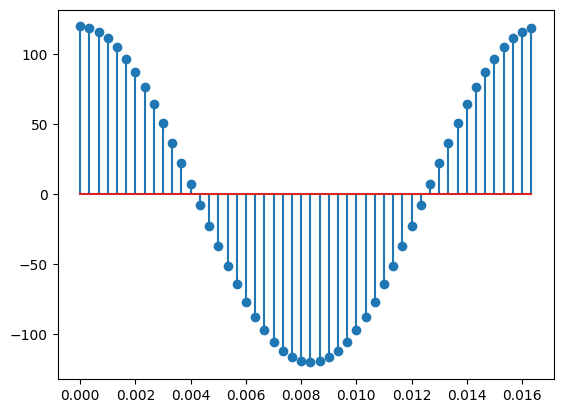

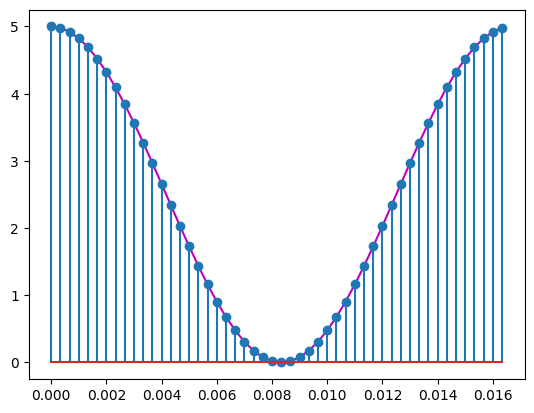

[0.         0.71428571 1.42857143 2.14285714 2.85714286 3.57142857
 4.28571429 5.        ]
(8,)
[[5.         4.28571429 3.57142857 2.85714286 2.14285714 1.42857143
  0.71428571 0.        ]
 [4.98028675 4.26600104 3.55171532 2.83742961 2.1231439  1.40885818
  0.69457247 0.01971325]
 [4.9214579  4.20717219 3.49288647 2.77860076 2.06431505 1.35002933
  0.63574362 0.0785421 ]
 [4.82444121 4.1101555  3.39586979 2.68158407 1.96729836 1.25301264
  0.53872693 0.17555879]
 [4.6907667  3.97648099 3.26219527 2.54790956 1.83362384 1.11933813
  0.40505241 0.3092333 ]
 [4.52254249 3.80825677 3.09397106 2.37968534 1.66539963 0.95111391
  0.2368282  0.47745751]
 [4.32242157 3.60813585 2.89385014 2.17956443 1.46527871 0.750993
  0.03670728 0.67757843]
 [4.09355997 3.37927426 2.66498855 1.95070283 1.23641712 0.5221314
  0.19215431 0.90644003]
 [3.83956699 3.12528127 2.41099556 1.69670984 0.98242413 0.26813842
  0.4461473  1.16043301]
 [3.56444823 2.85016251 2.1358768  1.42159109 0.70730537 0.00698034
  

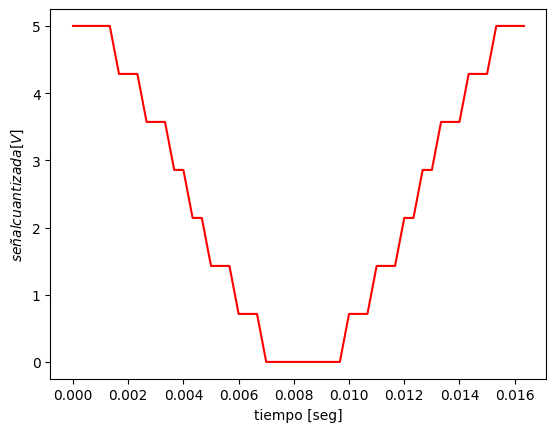

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Datos señal continua
A=120 #amplitud
f=60  #frecuencia
T=1/f #periodo

#Discretizar tiempo
ti=0 #tiempo inicial
tf=T #tiempo final
Fs=50*f #frecuencia de muestreo
Ts=1/Fs #tiempo de muestreo

#Crear vector discretizado
tv=np.arange(ti,tf,Ts)
print(tv)
print(tv.shape)

#Discretizar señal
xv=A*np.cos(2*np.pi*f*tv)
print(xv)
print(xv.shape)

#imprimir señal discretizada
plt.stem(tv,xv)
plt.show()

#Acondicionar la señal (modificar amplitud)
y_max=5
y_min=0
def modificar_amplitud (x,ymin,ymax):
  #Vamos a hallar la pendiente
  xmin=min(x) #Esta función me saca el minimo de la señal discretizada
  xmax=max(x) #Esta función me saca el maximo de la señal discretizada
  m=(ymax-ymin)/(xmax-xmin) #Aquí modificamos la pendiente para escalar la señal y que el dispositivo que trabaja de 0 a 5v la reciba de 0 a 5v
  c=ymax-m*xmax #Hallamos la c, porque la ecuación y=mx+c lo requiere y para que se mantenga la forma de la señal original
  yv=m*x+c #aqui calculamos la señal discretizada de 0 a 5v
  return yv

#vamos a pasarle los datos a la función modificar_amplitud para que nos calcule la señal acondicionada (yv)
yv= modificar_amplitud(xv,y_min,y_max)
#imprimir señal acondicionada
plt.plot(tv,yv,"m")
plt.stem(tv,yv)
plt.show()

#Vamos a cuantizar la señal

#primero, creamos los cajones según el numero de bits del dispositivo
nbits=3 #numero de bits
rmin= 0 #estado máximo
rmax= 5 #estado máximo
ve=np.linspace(rmin,rmax,2**nbits) #Se creo un vector (cajones) según el numero de bits del dispositivo
print(ve)
print(ve.shape)

#Ahora, vamos a hallar las distancias entre la señal discretizada (yv) y los cajones (ve)
d= cdist(yv.reshape(-1,1),ve.reshape(-1,1)) #utilizamos el reshape para modificar la dimension del vector al de una matriz y asi calcular las distancias
print(d)
d.shape

#Ahora, vamos a calcular la distancia más pequeña del cualquier punto respecto a un cajón para graficarla
ind=np.argmin(d,axis=1) # el axis=1 significa que va de 1 en 1 en la matriz de distancias encontrando la distancia más cerca
valores_cuantizados=ve[ind] #Aquí, ponemos el valor de yv en el cajon más cercano
print(yv)
print(valores_cuantizados)

#Ahora, vamos a imprimir la señal cuantizada (digital)
plt.plot(tv,valores_cuantizados,'r')
plt.xlabel("tiempo [seg]")
plt.ylabel("$ señal cuantizada [V] $")
plt.show()


